10:13:53 - cmdstanpy - INFO - Chain [1] start processing
10:13:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 778441054.9869807
Mean Absolute Error: 21384.087193738258


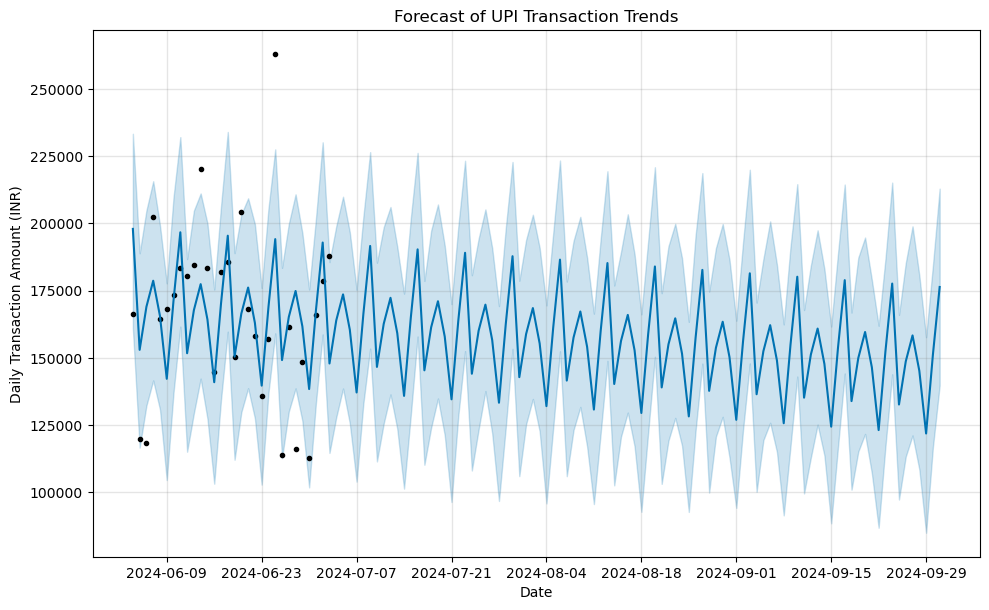

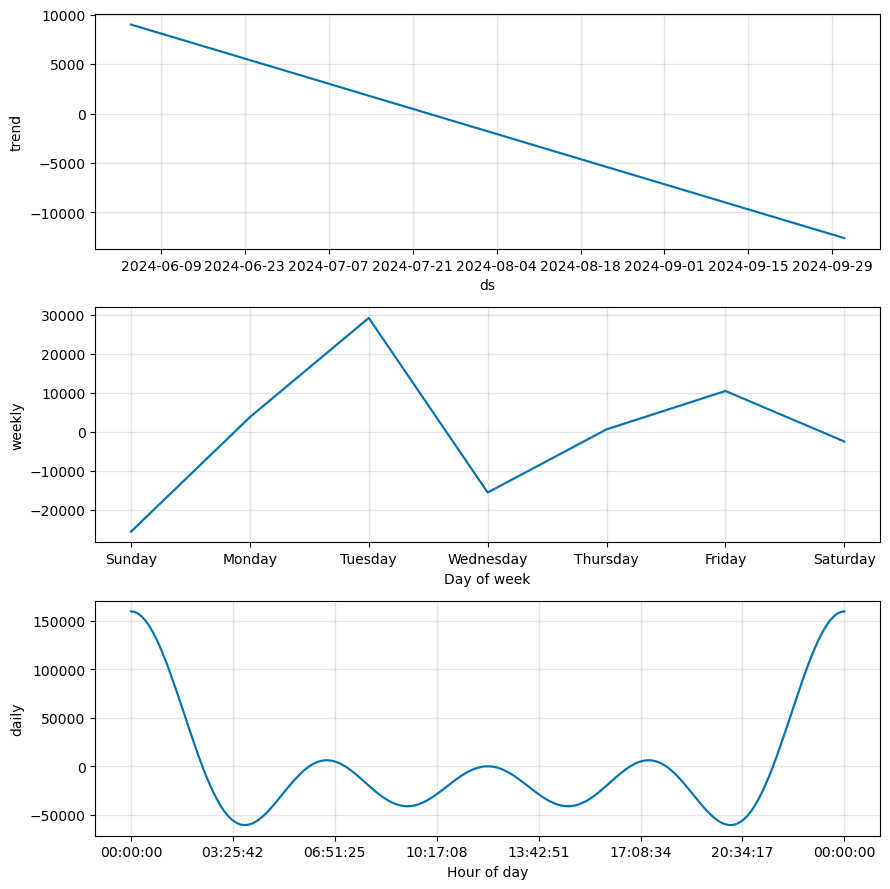

In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv(r'C:\Users\ssp1_\Downloads\archive (2)\transactions.csv')

# Convert 'Timestamp' to datetime and set as index for resampling
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

# Aggregate data by day (sum of transaction amounts)
daily_data = data['Amount (INR)'].resample('D').sum().reset_index()

# Prepare the dataset for Prophet
daily_data.columns = ['ds', 'y']

# Initialize the Prophet model with daily seasonality
model = Prophet(daily_seasonality=True)

# Fit the model with the daily data
model.fit(daily_data)

# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=90)  # Predict for the next 90 days

# Predict the future with the fitted model
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Forecast of UPI Transaction Trends')
plt.ylabel('Daily Transaction Amount (INR)')
plt.xlabel('Date')

# Show components of the forecast (trend, weekly, yearly seasonality)
fig2 = model.plot_components(forecast)

# Join the forecasted results with the actual data for comparison
# Make sure both are DataFrames with 'ds' as the index
forecasted_data = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]
actual_data = daily_data.set_index('ds')[['y']]

# Joining the data on date index
comparison_data = forecasted_data.join(actual_data, how='inner')

# Calculate performance metrics using actual and predicted data
mse = mean_squared_error(comparison_data['y'].dropna(), comparison_data['yhat'].dropna())
mae = mean_absolute_error(comparison_data['y'].dropna(), comparison_data['yhat'].dropna())

# Output the performance metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

plt.show()


In [2]:
pip install prophet

     ---------------------------------------- 13.3/13.3 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 94.5/94.5 kB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
